In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv
/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv
/kaggle/input/llm-detect-ai-generated-text/test_essays.csv
/kaggle/input/llm-detect-ai-generated-text/train_essays.csv
/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv


In [2]:
DATA_DIR = '/kaggle/input/llm-detect-ai-generated-text/'

for dirname, _, filenames in os.walk(DATA_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv
/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv
/kaggle/input/llm-detect-ai-generated-text/test_essays.csv
/kaggle/input/llm-detect-ai-generated-text/train_essays.csv


In [3]:
df_train_prompts = pd.read_csv(DATA_DIR + "train_prompts.csv")
print(df_train_prompts.info())
df_train_prompts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes
None


,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [4]:
df_train_essays = pd.read_csv(DATA_DIR + "train_essays.csv")
print(df_train_essays.info())
df_train_essays

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [5]:
df_train_essays[df_train_essays['generated'] == 1]

,id,prompt_id,text,generated
704,82131f68,1,"This essay will analyze, discuss and prove one...",1
740,86fe4f18,1,I strongly believe that the Electoral College ...,1
1262,eafb8a56,0,"Limiting car use causes pollution, increases c...",1


Using TensorFlow backend


Text(0.5, 1.0, 'Distribution of prompt ID')

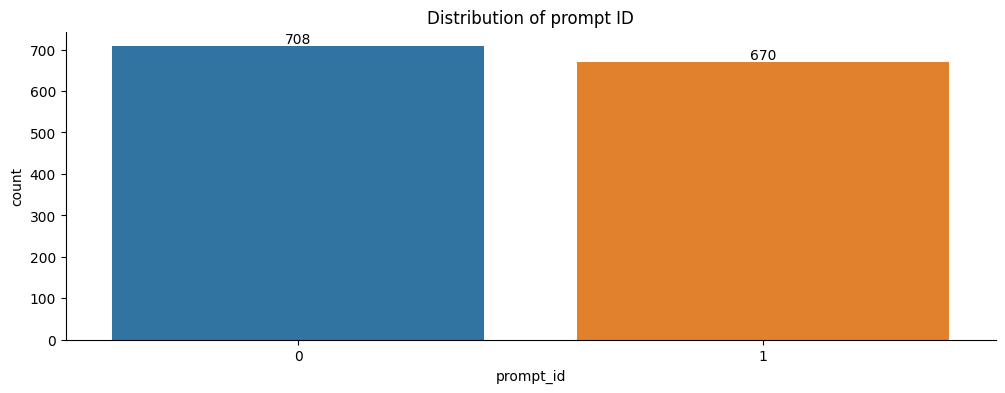

In [6]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays,
                   x="prompt_id")

abs_values = df_train_essays['prompt_id'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of prompt ID")

Text(0.5, 1.0, 'Distribution of Generated Text')

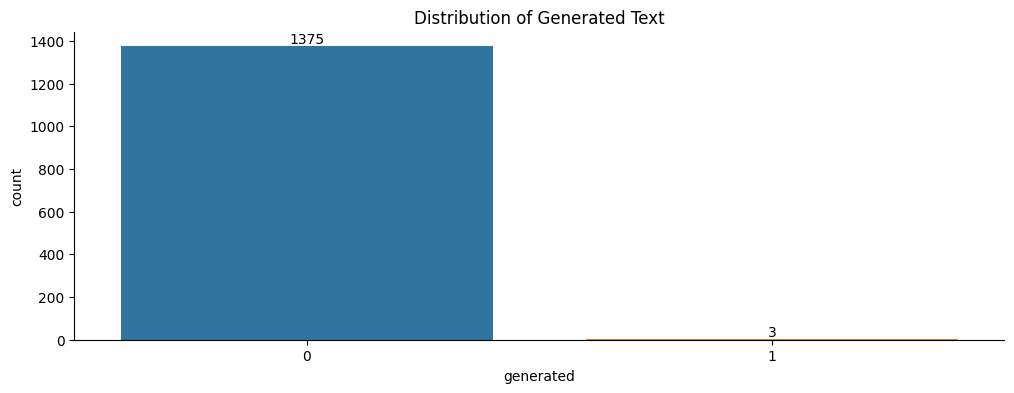

In [7]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays,
                   x="generated")

abs_values = df_train_essays['generated'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

In [8]:
df_test_essays = pd.read_csv(DATA_DIR + "test_essays.csv")
print(df_test_essays.info())
df_test_essays.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3 non-null      object
 1   prompt_id  3 non-null      int64 
 2   text       3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes
None


,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [9]:
df_test_essays["text"].apply(lambda x : len(x))

0    12
1    12
2    12
Name: text, dtype: int64

In [10]:
df_train_essays_ext = pd.read_csv('/kaggle/input/daigt-v2-train-dataset/train_v2_drcat_02.csv')



df_train_essays_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [11]:
df_train_essays_ext.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [12]:
df_train_essays_ext = df_train_essays_ext.drop(columns=['prompt_name','source','RDizzl3_seven'],axis=1)
df_train_essays_ext

,text,label
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0
...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1
44864,"Dear Senator,\n\nI am writing to you today to ...",1
44865,"Dear Senator,\n\nI am writing to you today to ...",1
44866,"Dear Senator,\n\nI am writing to you today to ...",1


Text(0.5, 1.0, 'Distribution of Generated Text')

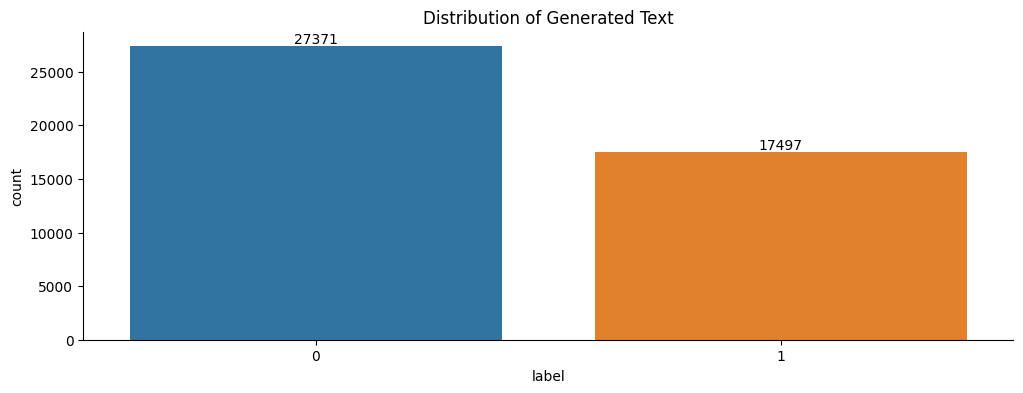

In [13]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()
ax = sns.countplot(data=df_train_essays_ext,
                   x="label")

abs_values = df_train_essays_ext['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

In [14]:
df_train_essays_ext_LSTM = df_train_essays_ext.copy()
df_train_essays_ext_LSTM

,text,label
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0
...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1
44864,"Dear Senator,\n\nI am writing to you today to ...",1
44865,"Dear Senator,\n\nI am writing to you today to ...",1
44866,"Dear Senator,\n\nI am writing to you today to ...",1


In [15]:
df_train_essays_ext["text_length"] = df_train_essays["text"].apply(lambda x : len(x.split()))
df_train_essays_ext

,text,label,text_length
0,Phones\n\nModern humans today are always on th...,0,584.0
1,This essay will explain if drivers should or s...,0,462.0
2,Driving while the use of cellular devices\n\nT...,0,744.0
3,Phones & Driving\n\nDrivers should not be able...,0,686.0
4,Cell Phone Operation While Driving\n\nThe abil...,0,871.0
...,...,...,...
44863,"Dear Senator,\n\nI am writing to you today to ...",1,NaN
44864,"Dear Senator,\n\nI am writing to you today to ...",1,NaN
44865,"Dear Senator,\n\nI am writing to you today to ...",1,NaN
44866,"Dear Senator,\n\nI am writing to you today to ...",1,NaN


Text(0.5, 0.98, 'Distribution of the length per essay')

<Figure size 4000x5000 with 0 Axes>

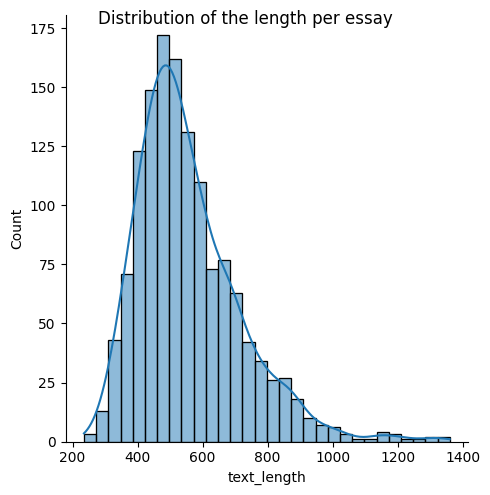

In [16]:
fig = plt.figure(figsize=(40,50))
plot = sns.displot(data=df_train_essays_ext,
                 x="text_length", bins=30, kde=True)
plot.fig.suptitle("Distribution of the length per essay")

In [17]:
X_LSTM = df_train_essays_ext_LSTM.drop('label',axis=1)

In [18]:
X_LSTM.head()

,text
0,Phones\n\nModern humans today are always on th...
1,This essay will explain if drivers should or s...
2,Driving while the use of cellular devices\n\nT...
3,Phones & Driving\n\nDrivers should not be able...
4,Cell Phone Operation While Driving\n\nThe abil...


In [19]:
y_LSTM = df_train_essays_ext_LSTM['label']

In [20]:
y_LSTM.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [21]:
y_LSTM.value_counts()

label
0    27371
1    17497
Name: count, dtype: int64

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional

In [24]:
# Vocabulary size 
voc_size = 50000
essay= X_LSTM.copy()

In [25]:
import nltk 
import re 
from nltk.corpus import stopwords

In [26]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


In [27]:
stop_words_set = set(stopwords.words('english'))

In [28]:
import dask.dataframe as dd

ddf = dd.from_pandas(essay, npartitions=4)  # Adjust the number of partitions as needed
corpus = ddf['text'].apply(lambda review: ' '.join([ps.stem(word) for word in re.sub('[^a-zA-Z]', ' ', review.lower()).split() if word not in stop_words_set]), meta=('text', 'object')).compute().tolist()

In [29]:
onehot_repr = [one_hot(words,voc_size)for words in corpus]


In [30]:
sent_length = 3000
embedding_docs = pad_sequences(onehot_repr, padding='pre',maxlen=sent_length)

embedding_docs

array([[    0,     0,     0, ...,  5962, 13561, 38186],
       [    0,     0,     0, ..., 24317, 29920, 33523],
       [    0,     0,     0, ..., 13333, 16357, 44127],
       ...,
       [    0,     0,     0, ..., 31916, 41712,  7418],
       [    0,     0,     0, ..., 30075, 41712,  7418],
       [    0,     0,     0, ..., 31916, 41712,  7418]], dtype=int32)

In [31]:
embedding_vector_features= 100

model=Sequential()

model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))

model.add(Bidirectional(LSTM(100)))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics=['accuracy']) 
          
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3000, 100)         5000000   
                                                                 
 bidirectional (Bidirection  (None, 200)               160800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 5161001 (19.69 MB)
Trainable params: 5161001 (19.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [32]:
import numpy as np
X_final_LSTM = np.array(embedding_docs)
y_final_LSTM = np.array(y_LSTM)

In [33]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_final_LSTM,y_final_LSTM,test_size=0.3,random_state=47)

In [ ]:
model.fit(X_train1,y_train1,validation_data=(X_test1,y_test1),epochs=5,batch_size=25)

Epoch 1/5
1257/1257 [==============================] - ETA: 0s - loss: 0.2009 - accuracy: 0.9181

In [ ]:
model.evaluate(X_test1, y_test1)